In [1]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')

## Standard Units

In [2]:
exams = Table.read_table('data/exams_fa18.csv')
exams.show(5)

Midterm,Final
91,88
89.5,84
78,71.5
87,88
72,72.5


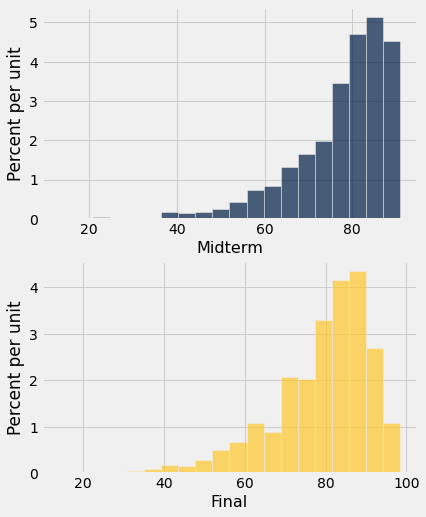

In [3]:
exams.hist(overlay=False, bins=20)

In [4]:
def standard_units(x):
    """Convert array x to standard units."""
    return (x - np.average(x)) / np.std(x)

In [10]:
midterm_su = standard_units(exams.column('Midterm'))
exams = exams.with_column('Midterm in Standard Units', midterm_su)

final_su = standard_units(exams.column('Final'))
exams = exams.with_column('Final in Standard Units', final_su)
print(np.average(exams.column('Midterm')))

print(np.average(exams.column('Final')))
exams.show(20)

77.83252818019935
79.20772946859903


Midterm,Final,Midterm in Standard Units,Final in Standard Units
91,88,1.16278,0.717241
89.5,84,1.03032,0.390935
78,71.5,0.0147889,-0.628768
87,88,0.809552,0.717241
72,72.5,-0.515053,-0.547191
71.5,61,-0.559206,-1.48532
82,92.5,0.368017,1.08433
84.5,87,0.588784,0.635664
85,92,0.632938,1.04355
78,71,0.0147889,-0.669556


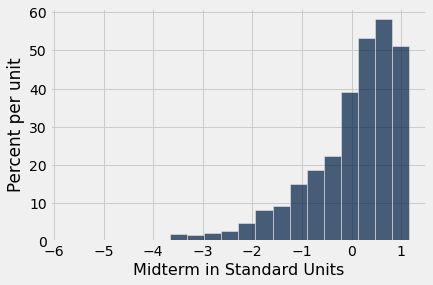

In [6]:
exams.hist('Midterm in Standard Units', bins=20)

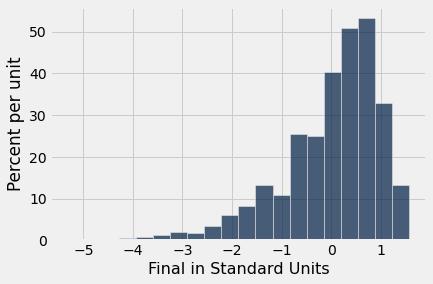

In [7]:
exams.hist('Final in Standard Units', bins=20)

## Central Limit Theorem ##

In [ ]:
# https://www.airportcodes.us/us-airports.htm

In [15]:
united = Table.read_table('data/united.csv') 
united_bins = np.arange(-20, 300, 10) # (-20, -10, 0, 10,...300)
united

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


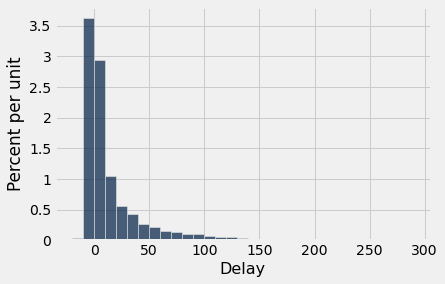

In [16]:
united.hist('Delay', bins=united_bins)

In [17]:
delays = united.column('Delay')
delay_mean = np.mean(delays)
delay_sd = np.std(delays)
delay_mean, delay_sd

(16.658155515370705, 39.480199851609314)

In [18]:
percentile(50, delays)

2

In [ ]:
def one_sample_mean(sample_size):
    """ Takes a sample from the population of flights and computes its mean"""
    ...
    ...
    
    

In [ ]:
one_sample_mean(100)

In [ ]:
def ten_thousand_sample_means(sample_size):
    """ repeating one_sample_mean 10,000 times, we get 10,000 different samples of 
    given sample size """
    ...
    ...
    ...
    ...
    ...
    

In [ ]:
sample_means_100 = ten_thousand_sample_means(100)

In [ ]:
sample_means_100

In [ ]:
len(sample_means_100)


In [ ]:
Table().with_column('Mean of 100 flight delays', sample_means_100).hist(bins=20)

print('Population Average:', delay_mean)
# should be a bell-shaped curve!


In [ ]:
# can you generate a histogram which shows the distribution
# of the mean of 400 flight delays?






In [ ]:
# what about the mean of 900 flight delays?







## Distribution of the Sample Average

In [ ]:
means_tbl = Table().with_columns(
    '400', sample_means_400,
    '900', sample_means_900,
)
means_tbl

In [ ]:
means_tbl.hist(bins = np.arange(5, 31, 0.5))
plots.title('Distribution of Sample Average');

In [ ]:
united.num_rows

In [ ]:
# How many possible sample means are there?
united.num_rows ** 400

In [ ]:
delay_mean = np.mean(united.column('Delay'))
delay_sd = np.std(united.column('Delay'))
delay_mean, delay_sd

In [ ]:
"""Empirical distribution of random sample means"""

def plot_and_summarize_sample_means(sample_size):
    sample_means = ten_thousand_sample_means(sample_size)
    sample_means_tbl = Table().with_column('Sample Means', sample_means)
    
    # Print some information about the distribution of the sample means
    print("Sample size: ", sample_size)
    print("Population mean:", delay_mean)
    print("Average of sample means: ", np.mean(sample_means))
    print("Population SD:", delay_sd)
    print("SD of sample means:", np.std(sample_means))

    # Plot a histogram of the sample means
    sample_means_tbl.hist(bins=20)
    plots.xlabel('Sample Means')
    plots.title('Sample Size ' + str(sample_size))

In [ ]:
plot_and_summarize_sample_means(100)

In [ ]:
39.48 / 3.932

In [ ]:
plot_and_summarize_sample_means(400)

In [ ]:
39.48 / 1.973

In [ ]:
plot_and_summarize_sample_means(625)

In [ ]:
39.48 / 1.577